# Enterprise of Future - Data Mining Project

## Kenan KESTANECI


### This project is about training two different models to classify/cluster a given data of cars. 

- There are two files:
    - mpgTraining.csv (This one is used to train the model)
    - mpgTest.csv (This one is used to predict and to check the accuracy)


- The data contain the following informations about cars:
     - consumption
     - displacement
     - horse power
     - cylinders
     - weight
     - acceleration
     - brand name
     - model of the car

In the first model, K-Means method will be used to cluster. The goal is to assign one cluster for each entry. 
Then the second model is Gaussian Naive Bayes where we will predict the consumption values of the cars by just using 5 inputs.
The inputs are (displacement, cylinders, horse power, weight, acceleration).
     
## Data Importing
At first we have to import the required libraries and then the data which will be used in this project.

In [26]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import preprocessing

Now, we have to insert the data in our python environment. Pandas library is powerful to import DataFrames.

In [27]:
train_data = pd.read_csv('mpgTrainingSet.csv')  #In this codeline, the data is imported by a predefined function "panda.read_csv"

train_data.columns=['consumption','cylinders','displacement','horse_power','weight','acceleration','Brand', 'Model', 'column9','column10','column11','column12'] #Column titles are identified

print(train_data) #We check if we imported well.

     consumption  cylinders  displacement  horse_power  weight  acceleration  \
0             15          8         350.0        165.0    3693          11.5   
1             20          8         318.0        150.0    3436          11.0   
2             15          8         304.0        150.0    3433          12.0   
3             15          8         302.0        140.0    3449          10.5   
4             15          8         429.0        198.0    4341          10.0   
..           ...        ...           ...          ...     ...           ...   
336           25          4         140.0         86.0    2790          15.6   
337           45          4          97.0         52.0    2130          24.6   
338           30          4         135.0         84.0    2295          11.6   
339           30          4         120.0         79.0    2625          18.6   
340           30          4         119.0         82.0    2720          19.4   

        Brand      Model column9 column

If there is no problem with the import, then we can check if we need cleaning of data. 


## Data Cleaning

We can check first 5 entries and make a decision for cleaning.


In [28]:
cleanData = train_data.head()   #To see which columns are useless and have missing values.
print(cleanData)

   consumption  cylinders  displacement  horse_power  weight  acceleration  \
0           15          8         350.0        165.0    3693          11.5   
1           20          8         318.0        150.0    3436          11.0   
2           15          8         304.0        150.0    3433          12.0   
3           15          8         302.0        140.0    3449          10.5   
4           15          8         429.0        198.0    4341          10.0   

      Brand      Model column9 column10 column11            column12  
0     buick    skylark     320      NaN      NaN      ;;;;;;;dodge=2  
1  plymouth  satellite     NaN      NaN      NaN   ;;;;;;;plymouth=3  
2       amc      rebel     sst      NaN      NaN  ;;;;;;;chevrolet=4  
3      ford     torino     NaN      NaN      NaN      ;;;;;;;buick=5  
4      ford    galaxie     500      NaN      NaN     ;;;;;;;toyota=6  


As you can see, we have a lot of missing values under some columns (column9, column 10, column 11, column12)

In [29]:
train_data.isnull().sum() #to see how many missing values do we have per column

consumption       0
cylinders         0
displacement      0
horse_power       0
weight            0
acceleration      0
Brand             0
Model             2
column9         174
column10        301
column11        338
column12          0
dtype: int64

By checking the numbers above, we can confirm that we need to remove some columns. 
Column 12 have no missing values. However it does not contain any meaningful value. So we will also drop that column.

In [30]:
train_data = train_data.drop(['column9','column10','column11','column12'],axis=1)   #we drop the useless columns from the main data
train_data=train_data.drop([97,291],axis=0) #we drop 2 more rows because they have still missing values under "Model" column
train_data.isnull().sum() #to check how many missing values left

consumption     0
cylinders       0
displacement    0
horse_power     0
weight          0
acceleration    0
Brand           0
Model           0
dtype: int64

As you can see, there are no more missing values and we have a ready to process data.

### Visualization

array([[<AxesSubplot:xlabel='consumption', ylabel='consumption'>,
        <AxesSubplot:xlabel='cylinders', ylabel='consumption'>,
        <AxesSubplot:xlabel='displacement', ylabel='consumption'>,
        <AxesSubplot:xlabel='horse_power', ylabel='consumption'>,
        <AxesSubplot:xlabel='weight', ylabel='consumption'>,
        <AxesSubplot:xlabel='acceleration', ylabel='consumption'>],
       [<AxesSubplot:xlabel='consumption', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='horse_power', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='consumption', ylabel='displacement'>,
        <AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel=

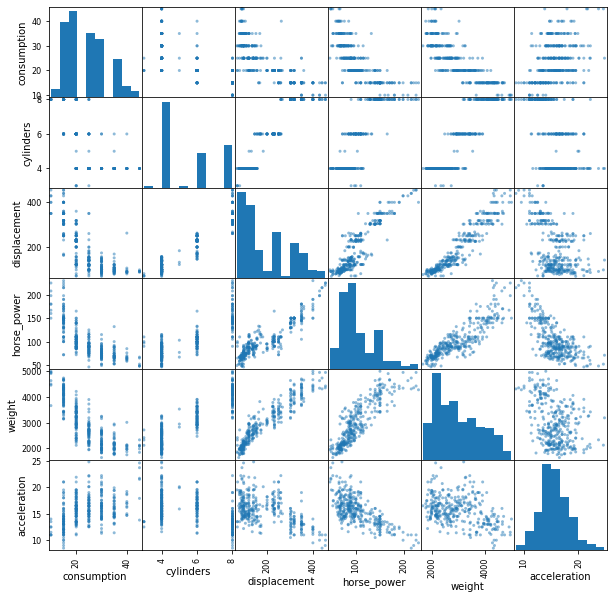

In [31]:
scatter_matrix(train_data, figsize=(10, 10), diagonal='hist') #it generates all possible graphs

It is not easy to identify the clusters just by looking at these figures. Therefore we need an unsupervised method which is K-Means. This method can help us when do not know how many clusters we deal with.

But before that we need to import our test data before forgetting it.

### Importing test data

In [32]:
test_data=pd.read_csv('mpgTestSet.csv') #to read the test data
test_data.columns=['consumption','cylinders','displacement','horse_power','weight','acceleration','Brand', 'Model','Brand1','Brand2']
test_data=test_data.drop(['Brand1','Brand2'],axis=1) #we drop the useless columns
print(test_data.keys()) #we can check whether it is imported or not by just printing the column labels.

Index(['consumption', 'cylinders', 'displacement', 'horse_power', 'weight',
       'acceleration', 'Brand', 'Model'],
      dtype='object')


Now we can proceed with clustering.

## Clustering with K-Means

Before starting, we need to introduce one important concept which is the data normalization. It is the organization of data to appear similar across all records and fields. It increases the cohesion of entry types leading to cleansing, lead generation, segmentation, and higher quality data. 

Once the normalization is done, we will end up with standardized information entry.

In [33]:
#Normalization
norm_data = train_data.copy()   #normalized DataFrame
norm_data=norm_data.drop(['Brand','Model'],axis=1)
dataColumns=['consumption','cylinders','displacement','horse_power','weight','acceleration']
for i in dataColumns:     # a predefined normalization algorithm is used which is sklearn.preprocessing.normalize
    norm_array=np.array(train_data[i]) #column i in np array
    norm_column= preprocessing.normalize([norm_array]) # normalized values of entries of column i
    norm_data[i]=norm_column.transpose()  #we insert the normalized values to our dataframe
print(norm_data.head()) #to visualize the first few entries of the normalized data

   consumption  cylinders  displacement  horse_power    weight  acceleration
0     0.032232   0.076378      0.087684     0.082093  0.064978      0.039340
1     0.042976   0.076378      0.079667     0.074630  0.060456      0.037629
2     0.032232   0.076378      0.076160     0.074630  0.060404      0.041050
3     0.032232   0.076378      0.075659     0.069655  0.060685      0.035919
4     0.032232   0.076378      0.107476     0.098512  0.076380      0.034208


In [34]:
#KMeans Clustering
kmeans=KMeans(n_clusters=3) #3 clusters are assumed as 'Fast cars' 'Average cars' 'Slow cars'
kmeans.fit(norm_data[['cylinders','horse_power','weight','acceleration']]) #the model is based on 4 different inputs
y_pred = kmeans.predict(norm_data[['cylinders','horse_power','weight','acceleration']])  #the clusters of the training dara are identified
pred=pd.DataFrame(y_pred)   #pred is the data frame version of y_pred in order to use pandas' features
pred.columns=['Prediction_kmean']   #the column name is identified
train_data=pd.concat([train_data,pred],axis=1)  #pred and train_data are concatenated
centroids = kmeans.cluster_centers_       #this line shows the centroids

print(train_data.head())

   consumption  cylinders  displacement  horse_power  weight  acceleration  \
0         15.0        8.0         350.0        165.0  3693.0          11.5   
1         20.0        8.0         318.0        150.0  3436.0          11.0   
2         15.0        8.0         304.0        150.0  3433.0          12.0   
3         15.0        8.0         302.0        140.0  3449.0          10.5   
4         15.0        8.0         429.0        198.0  4341.0          10.0   

      Brand      Model  Prediction_kmean  
0     buick    skylark               2.0  
1  plymouth  satellite               2.0  
2       amc      rebel               2.0  
3      ford     torino               2.0  
4      ford    galaxie               2.0  


Now we can check if all the entries have clusters or not.

In [35]:
print(train_data[train_data['Prediction_kmean'].isnull()])

     consumption  cylinders  displacement  horse_power  weight  acceleration  \
339         30.0        4.0         120.0         79.0  2625.0          18.6   
340         30.0        4.0         119.0         82.0  2720.0          19.4   

     Brand   Model  Prediction_kmean  
339   ford  ranger               NaN  
340  chevy    s-10               NaN  


We have to rows which don't have values. So we can remove them.

In [36]:
train_data=train_data.drop([339,340],axis=0)    #after the concetanation,we got 2 NaN values, and we drop them
print(train_data[train_data['Prediction_kmean'].isnull()])

Empty DataFrame
Columns: [consumption, cylinders, displacement, horse_power, weight, acceleration, Brand, Model, Prediction_kmean]
Index: []


We have no more NaN values, so we can visualize the clusters of our train data.

<AxesSubplot:xlabel='horse_power', ylabel='acceleration'>

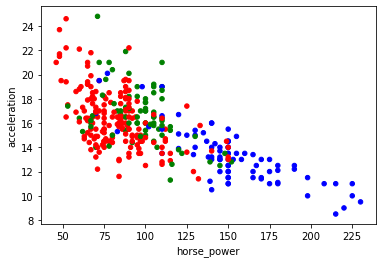

In [39]:
#Visualization of clusters
colors=np.where(train_data['Prediction_kmean']==0,'r','-')  #we create a colors array to assign one color for each cluster
colors[train_data['Prediction_kmean']==1]='g'
colors[train_data['Prediction_kmean']==2]='b'
train_data.plot(x='horse_power',y='acceleration',kind='scatter',c=colors)   #scatter plot where x=horsePower, y=acceleration with colors


Before predicting the clusters of test data, we have to normalize the data frame because the model is trained with the normalized values.

In [40]:
#Prediction of test data with the defined Kmeans model
norm_test=test_data.copy()  #we define the normalized test data
norm_test=norm_test.drop(['Brand','Model'],axis=1)
for i in dataColumns:   #we run the normalization algorithm 
    norm_array=np.array(test_data[i]) #column i in np array
    norm_column= preprocessing.normalize([norm_array]) # normalized values of entries of column i
    norm_test[i]=norm_column.transpose()  #we insert the normalized values to our dataframe


In [41]:
test_pred = kmeans.predict(norm_test[['cylinders','horse_power','weight','acceleration']])   #we predict the cluster of each entry in the test data
test_pred=pd.DataFrame(test_pred)
test_pred.columns=['Prediction']
test_data=pd.concat([test_data,test_pred],axis=1) 

print(test_data.head()) #To check the prediction of clusters.

   consumption  cylinders  displacement  horse_power  weight  acceleration  \
0           15          8         383.0        170.0    3563          10.0   
1           15          8         340.0        160.0    3609           8.0   
2           15          8         400.0        150.0    3761           9.5   
3           15          8         455.0        225.0    3086          10.0   
4           25          4         113.0         95.0    2372          15.0   

       Brand       Model  Prediction  
0      dodge  challenger           2  
1   plymouth       'cuda           2  
2  chevrolet       monte           2  
3      buick      estate           2  
4     toyota      corona           2  


<AxesSubplot:xlabel='horse_power', ylabel='acceleration'>

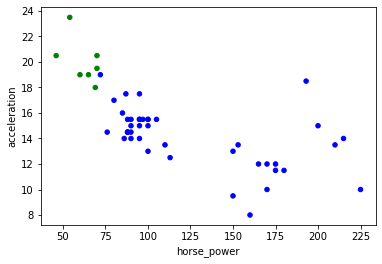

In [42]:
#Vizualization of test data clusters
test_colors=np.where(test_data['Prediction']==0,'r','-')
test_colors[test_data['Prediction']==1]='g'
test_colors[test_data['Prediction']==2]='b'
test_data.plot(x='horse_power',y='acceleration',kind='scatter',c=test_colors)

In our test data, there are only instances from the two clusters according to the trained model. We cannot check the accuracy wtih this method because the clusters we have are imaginary ones.


## Classifying with Gaussian Naive Bayes

### Remark: I didn't normalize the data in this method, because I got a higher accuracy score without normalization.

Within this method, we will classify our data. The aim is to predict the consumption values by using the following features of cars:
- cylinders
- displacement
- horse_power
- weight
- acceleration

Before starting, we need to reset our data in order to get rid of the modifications made by Kmeans algorithm.

In [44]:
train_data = pd.read_csv('mpgTrainingSet.csv')  
train_data.columns=['consumption','cylinders','displacement','horse_power','weight','acceleration','Brand', 'Model', 'column9','column10','column11','column12'] 
train_data = train_data.drop(['column9','column10','column11','column12'],axis=1)   
train_data=train_data.drop([97,291],axis=0) 
test_data=pd.read_csv('mpgTestSet.csv') 
test_data.columns=['consumption','cylinders','displacement','horse_power','weight','acceleration','Brand', 'Model','Brand1','Brand2']
test_data=test_data.drop(['Brand1','Brand2'],axis=1) 

print(train_data.head())
print(test_data.head())

   consumption  cylinders  displacement  horse_power  weight  acceleration  \
0           15          8         350.0        165.0    3693          11.5   
1           20          8         318.0        150.0    3436          11.0   
2           15          8         304.0        150.0    3433          12.0   
3           15          8         302.0        140.0    3449          10.5   
4           15          8         429.0        198.0    4341          10.0   

      Brand      Model  
0     buick    skylark  
1  plymouth  satellite  
2       amc      rebel  
3      ford     torino  
4      ford    galaxie  
   consumption  cylinders  displacement  horse_power  weight  acceleration  \
0           15          8         383.0        170.0    3563          10.0   
1           15          8         340.0        160.0    3609           8.0   
2           15          8         400.0        150.0    3761           9.5   
3           15          8         455.0        225.0    3086         

Since we reset our data frames, we can move on with the method.

We will split our columns to fit them into the method. We need two data frames for training the model:
- features_train ; this one significates the features that will be used for the prediction.
- target_train ; DataFrame of the predicted value which is the consumption.

In [45]:
classifier = GaussianNB()   #we will use classifier as the model trainer
features_train = train_data[['cylinders','displacement','horse_power','weight','acceleration']]
target_train = train_data[['consumption']]
features_test = test_data[['cylinders','displacement','horse_power','weight','acceleration']] #we apply the same for the test data to be able to use it for chcecking accuracy.
target_test = test_data[['consumption']]


Now we can train our model with GaussianNB.fit() method.

In [46]:
classifier.fit(features_train,target_train)

C:\Users\kenan_0lb9woi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

We have trained our model. Then we can check it with the test data.

We use GaussianNB.predict() in order to predict the consumption value of cars.

In [47]:
target_pred = classifier.predict(features_test)
target_pred = pd.DataFrame(target_pred)
target_pred.columns=['Consumption_prediction']
test_data = pd.concat([test_data,target_pred],axis = 1)
print(test_data.head())


   consumption  cylinders  displacement  horse_power  weight  acceleration  \
0           15          8         383.0        170.0    3563          10.0   
1           15          8         340.0        160.0    3609           8.0   
2           15          8         400.0        150.0    3761           9.5   
3           15          8         455.0        225.0    3086          10.0   
4           25          4         113.0         95.0    2372          15.0   

       Brand       Model  Consumption_prediction  
0      dodge  challenger                      15  
1   plymouth       'cuda                      15  
2  chevrolet       monte                      15  
3      buick      estate                      10  
4     toyota      corona                      35  


As you can see, our real consumption value and the predicted one match for the first three entries. Now, we can check the accuracy score which indicates the percentage of matched entries.

In [48]:
accuracy_score(target_test,target_pred)

0.42857142857142855

42.8% of the predcitions are correct for this test data.